# Time Series Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('goldstock.csv')

In [3]:
if df.isnull().sum().sum() > 0:
    df = df.dropna()

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

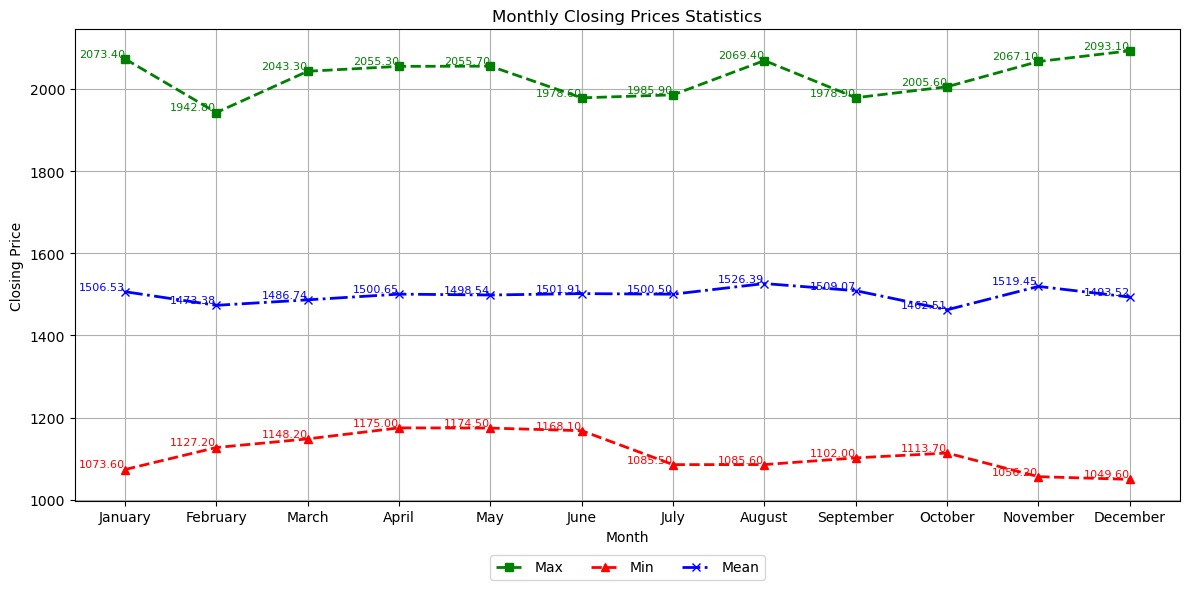

In [5]:
# Extract month from the 'Date' column
df['Month'] = df['Date'].dt.month


monthly_stats = df.groupby('Month')['Close'].agg(['max', 'min', 'mean'])

months_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


plt.figure(figsize=(12, 6))

plt.plot(monthly_stats.index, monthly_stats['max'], marker='s', color='green', linestyle='--', linewidth=2, label='Max')
plt.plot(monthly_stats.index, monthly_stats['min'], marker='^', color='red', linestyle='--', linewidth=2, label='Min')
plt.plot(monthly_stats.index, monthly_stats['mean'], marker='x', color='blue', linestyle='-.', linewidth=2, label='Mean')

# Add data point values on each point
for i, (maximum, minimum, mean) in enumerate(zip(monthly_stats['max'], monthly_stats['min'], monthly_stats['mean'])):
    plt.text(monthly_stats.index[i], maximum, f"{maximum:.2f}", ha='right', va='bottom', fontsize=8, color='green')
    plt.text(monthly_stats.index[i], minimum, f"{minimum:.2f}", ha='right', va='bottom', fontsize=8, color='red')
    plt.text(monthly_stats.index[i], mean, f"{mean:.2f}", ha='right', va='bottom', fontsize=8, color='blue')

plt.title('Monthly Closing Prices Statistics')
plt.xlabel('Month')
plt.ylabel('Closing Price')
plt.xticks(range(1, 13), labels=months_names)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.grid(True)
plt.tight_layout()
plt.show()

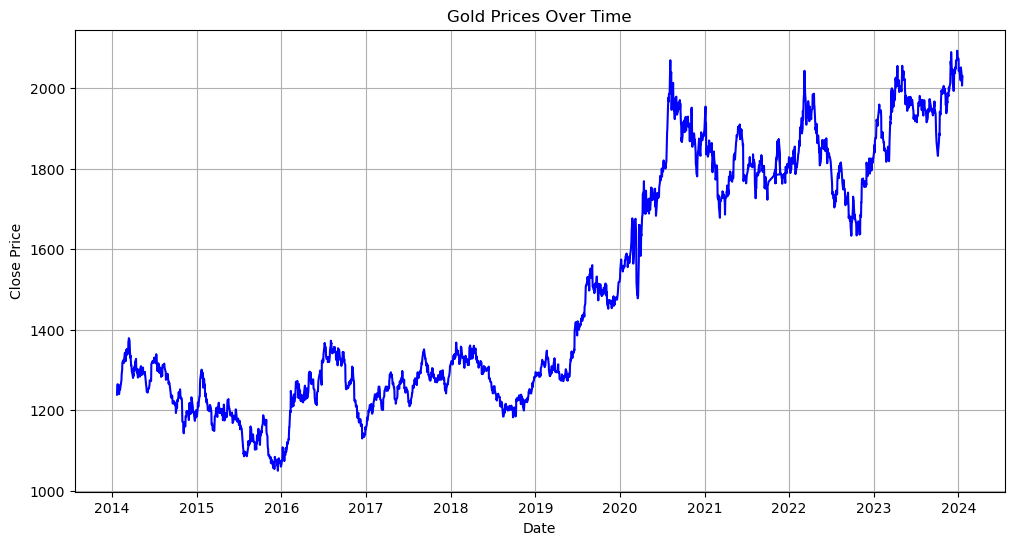

In [6]:
df.set_index('Date', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], color='blue')
plt.title('Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

#### Let's decompose the time series data into its trend, seasonal, and residual components using seasonal decomposition

In [7]:
decomposition = seasonal_decompose(df['Close'], model='additive', period=365)  

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

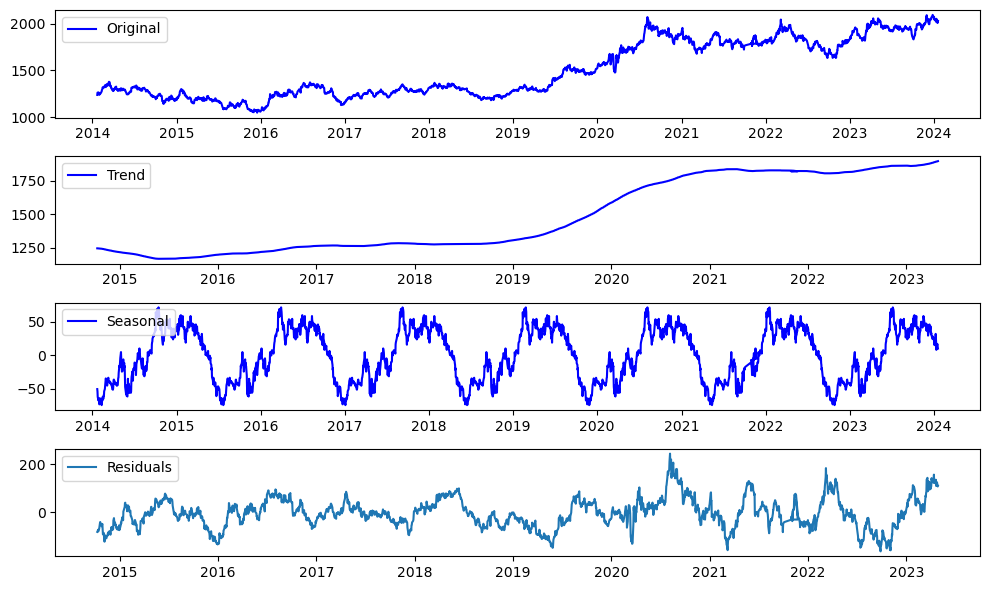

In [8]:
plt.figure(figsize=(10, 6))

plt.subplot(411)
plt.plot(df['Close'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='blue')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()

plt.show()

# Advanced Modeling 
#### Evaluation and comparison of performance of different forecasting algorithms.

In [9]:
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [10]:
df = pd.read_csv("goldstock.csv")

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [12]:
df = df.sort_index()

### I intend to utilize all available data up to the conclusion of 2023 as our training dataset. Subsequently, we will employ the data from the year 2024 as our test set, aiming to forecast across the entirety of the dataset

In [13]:
train = df.loc[df.index <= '2023-12-31']
test = df.loc['2024-01-01':]

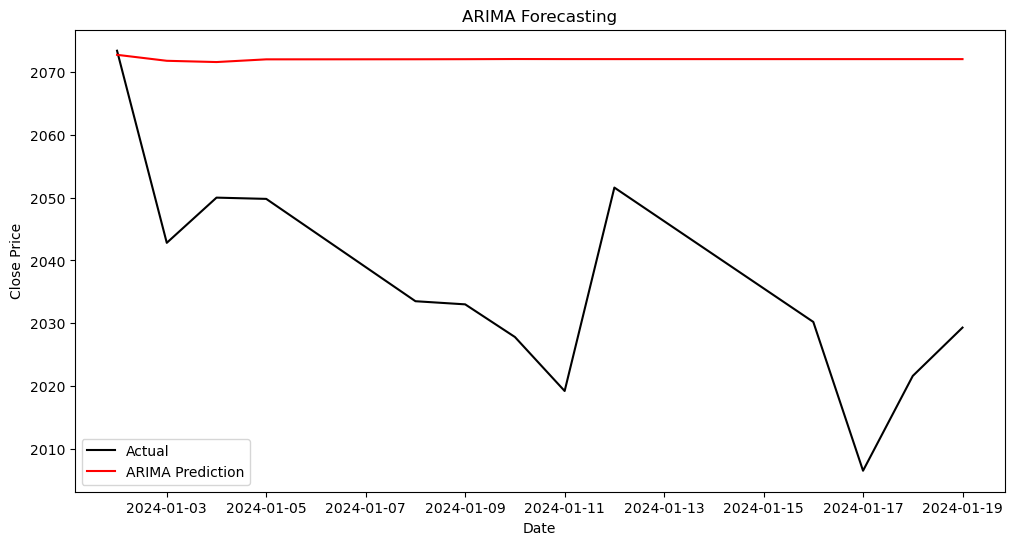

In [14]:
# ARIMA Model
order_arima = (5, 1, 0)  # Example ARIMA(5,1,0)
arima_model = ARIMA(train['Close'], order=order_arima)
arima_fit = arima_model.fit()
forecast_arima = arima_fit.forecast(steps=len(test))

mae_arima = mean_absolute_error(test['Close'], forecast_arima)
mse_arima = mean_squared_error(test['Close'], forecast_arima)
rmse_arima = np.sqrt(mse_arima)

plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Close'], label='Actual', color='black')
plt.plot(test.index, forecast_arima[:len(test)], label='ARIMA Prediction', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show()



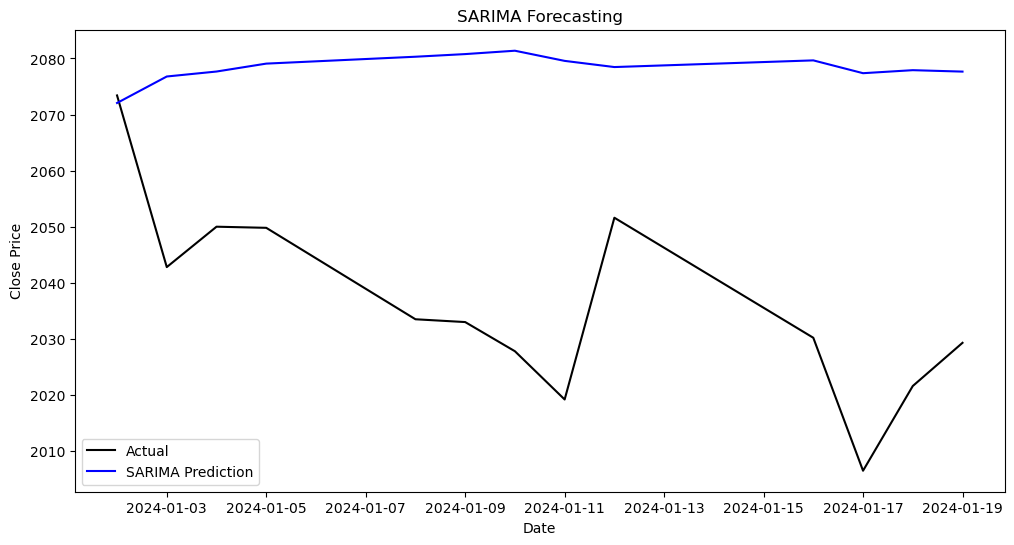

In [15]:
# SARIMA Model
order_sarima = (1, 1, 1)  # Example SARIMA(1,1,1)
seasonal_order_sarima = (1, 1, 1, 12)  # Example seasonal order (1,1,1,12)
sarima_model = SARIMAX(train['Close'], order=order_sarima, seasonal_order=seasonal_order_sarima)
sarima_fit = sarima_model.fit()
forecast_sarima = sarima_fit.forecast(steps=len(test))

mae_sarima = mean_absolute_error(test['Close'], forecast_sarima)
mse_sarima = mean_squared_error(test['Close'], forecast_sarima)
rmse_sarima = np.sqrt(mse_sarima)

plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Close'], label='Actual', color='black')
plt.plot(test.index, forecast_sarima[:len(test)], label='SARIMA Prediction', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('SARIMA Forecasting')
plt.legend()
plt.show()

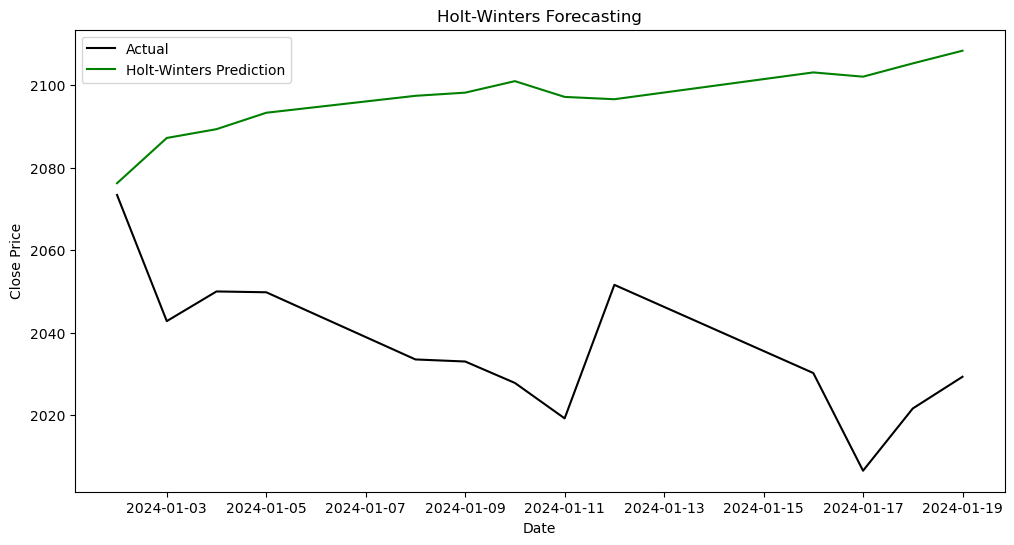

In [16]:
# Holt-Winters Model
hw_model = ExponentialSmoothing(train['Close'], seasonal_periods=12, trend='add', seasonal='add')
hw_fit = hw_model.fit()
forecast_hw = hw_fit.forecast(steps=len(test))

mae_hw = mean_absolute_error(test['Close'], forecast_hw)
mse_hw = mean_squared_error(test['Close'], forecast_hw)
rmse_hw = np.sqrt(mse_hw)

plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Close'], label='Actual', color='black')
plt.plot(test.index, forecast_hw[:len(test)], label='Holt-Winters Prediction', color='green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Holt-Winters Forecasting')
plt.legend()
plt.show()

19:09:42 - cmdstanpy - INFO - Chain [1] start processing
19:09:43 - cmdstanpy - INFO - Chain [1] done processing


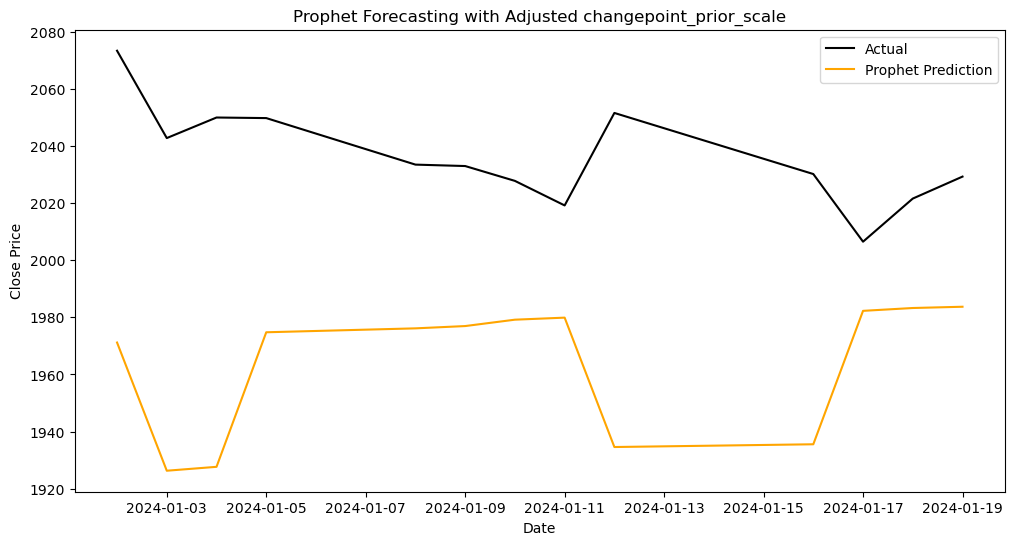

In [17]:
# Prophet Model with adjusted changepoint_prior_scale
prophet_model = Prophet()  # Adjust this value as needed
train_prophet = train.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
test_prophet = test.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_model.fit(train_prophet)
future = prophet_model.make_future_dataframe(periods=len(test) + 6)  # Extend future to include 6 additional months
forecast_prophet = prophet_model.predict(future)['yhat'].tail(len(test))

mae_prophet = mean_absolute_error(test_prophet['y'], forecast_prophet)
mse_prophet = mean_squared_error(test_prophet['y'], forecast_prophet)
rmse_prophet = np.sqrt(mse_prophet)

plt.figure(figsize=(12, 6))
plt.plot(test_prophet['ds'], test_prophet['y'], label='Actual', color='black')
plt.plot(test_prophet['ds'], forecast_prophet[:len(test_prophet)], label='Prophet Prediction', color='orange')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Prophet Forecasting with Adjusted changepoint_prior_scale')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


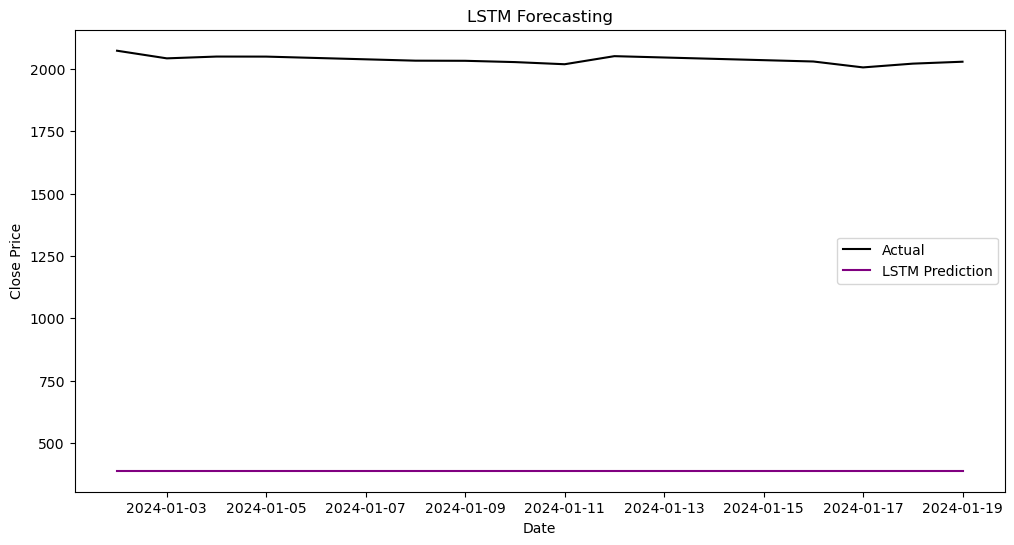

In [18]:
# LSTM Model
X_train, y_train = train[['Close', 'Volume']].values, train['Close'].values
X_test, y_test = test[['Close', 'Volume']].values, test['Close'].values
X_train_lstm = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, verbose=0)
forecast_lstm = lstm_model.predict(X_test_lstm)

mae_lstm = mean_absolute_error(test['Close'], forecast_lstm)
mse_lstm = mean_squared_error(test['Close'], forecast_lstm)
rmse_lstm = np.sqrt(mse_lstm)

plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Close'], label='Actual', color='black')
plt.plot(test.index, forecast_lstm[:len(test)], label='LSTM Prediction', color='purple')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('LSTM Forecasting')
plt.legend()
plt.show()

In [19]:
# Print evaluation results
results_df = pd.DataFrame({
    'MAE': [mae_arima, mae_sarima, mae_hw, mae_prophet, mae_lstm],
    'MSE': [mse_arima, mse_sarima, mse_hw, mse_prophet, mse_lstm],
    'RMSE': [rmse_arima, rmse_sarima, rmse_hw, rmse_prophet, rmse_lstm]
}, index=["ARIMA", "SARIMA", "Holt-Winters", "Prophet", "LSTM"])
print(results_df)


                      MAE           MSE         RMSE
ARIMA           36.101379  1.570151e+03    39.625136
SARIMA          42.505876  2.112254e+03    45.959267
Holt-Winters    60.546596  4.229658e+03    65.035821
Prophet         72.107782  6.290489e+03    79.312603
LSTM          1646.961530  2.712759e+06  1647.045497


### Now Let's forecast prices for the entire dataset

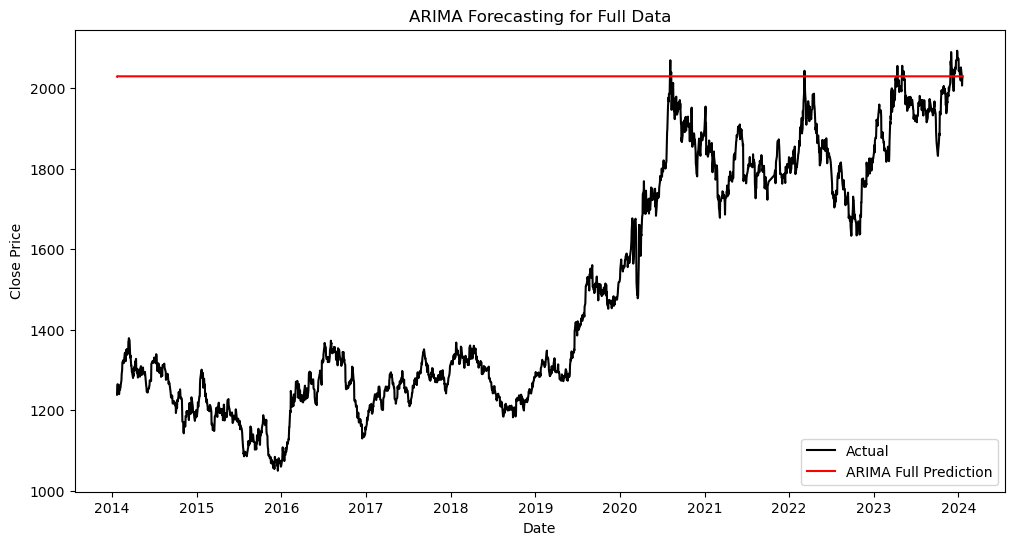

In [20]:
# ARIMA Model for Full Data
arima_model_full = ARIMA(df['Close'], order=order_arima)
arima_fit_full = arima_model_full.fit()
forecast_arima_full = arima_fit_full.forecast(steps=len(df) + 6)

mae_arima_full = mean_absolute_error(df['Close'], forecast_arima_full[:len(df)])
mse_arima_full = mean_squared_error(df['Close'], forecast_arima_full[:len(df)])
rmse_arima_full = np.sqrt(mse_arima_full)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual', color='black')
plt.plot(df.index, forecast_arima_full[:len(df)], label='ARIMA Full Prediction', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARIMA Forecasting for Full Data')
plt.legend()
plt.show()

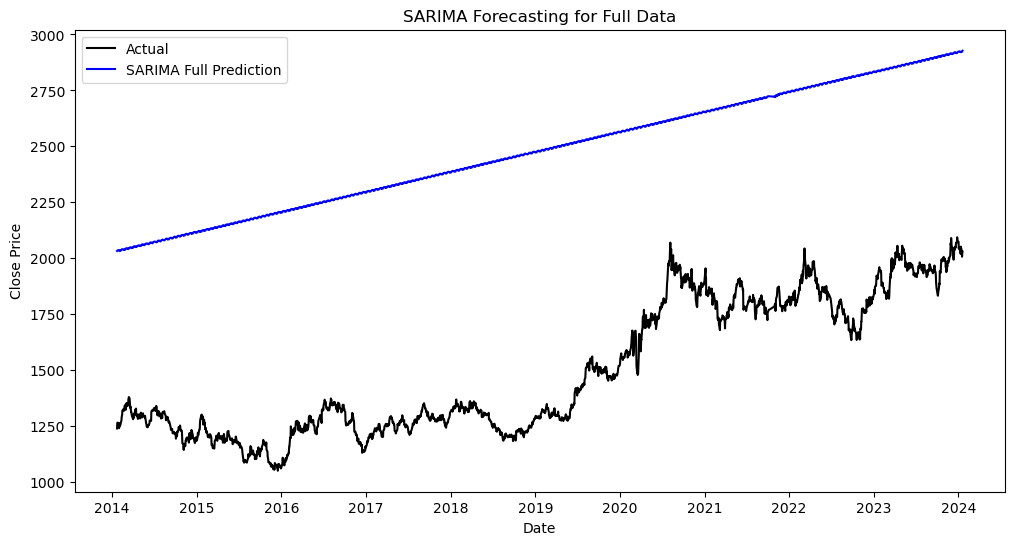

In [21]:
# SARIMA Model for Full Data
sarima_model_full = SARIMAX(df['Close'], order=order_sarima, seasonal_order=seasonal_order_sarima)
sarima_fit_full = sarima_model_full.fit()
forecast_sarima_full = sarima_fit_full.forecast(steps=len(df) + 6)

mae_sarima_full = mean_absolute_error(df['Close'], forecast_sarima_full[:len(df)])
mse_sarima_full = mean_squared_error(df['Close'], forecast_sarima_full[:len(df)])
rmse_sarima_full = np.sqrt(mse_sarima_full)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual', color='black')
plt.plot(df.index, forecast_sarima_full[:len(df)], label='SARIMA Full Prediction', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('SARIMA Forecasting for Full Data')
plt.legend()
plt.show()

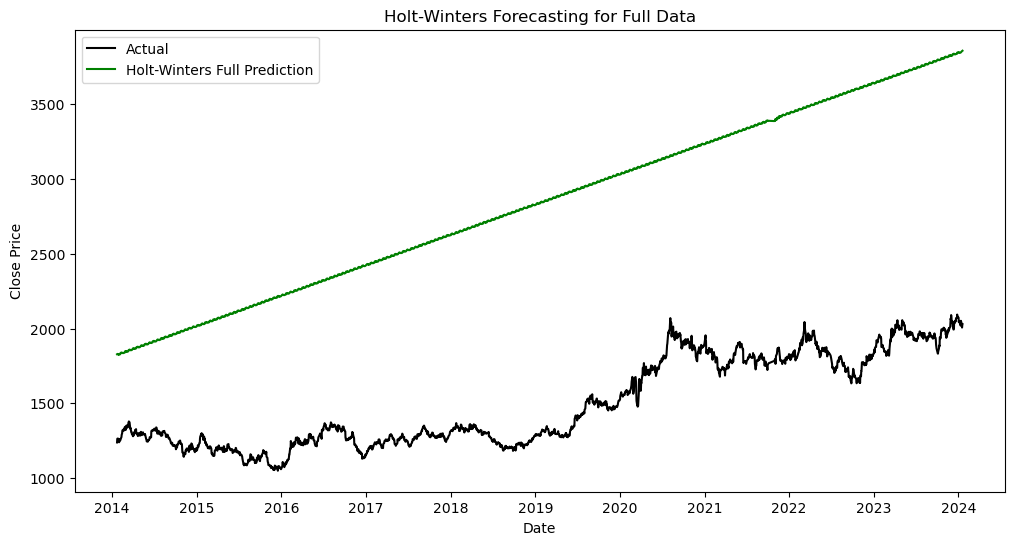

In [22]:
# Train-test split for Holt-Winters
train_size_hw = int(len(df) * 0.8)  # 80% of the data for training

train_hw = df.iloc[:train_size_hw]
test_hw = df.iloc[train_size_hw:]

# Holt-Winters Model for Full Data
hw_model_full = ExponentialSmoothing(train_hw['Close'], seasonal_periods=12, trend='add', seasonal='add')
hw_fit_full = hw_model_full.fit()
forecast_hw_full = hw_fit_full.forecast(steps=len(df) + 6)

mae_hw_full = mean_absolute_error(test_hw['Close'], forecast_hw_full[-len(test_hw):])
mse_hw_full = mean_squared_error(test_hw['Close'], forecast_hw_full[-len(test_hw):])
rmse_hw_full = np.sqrt(mse_hw_full)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual', color='black')
plt.plot(df.index, forecast_hw_full[:len(df)], label='Holt-Winters Full Prediction', color='green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Holt-Winters Forecasting for Full Data')
plt.legend()
plt.show()


19:10:01 - cmdstanpy - INFO - Chain [1] start processing
19:10:02 - cmdstanpy - INFO - Chain [1] done processing


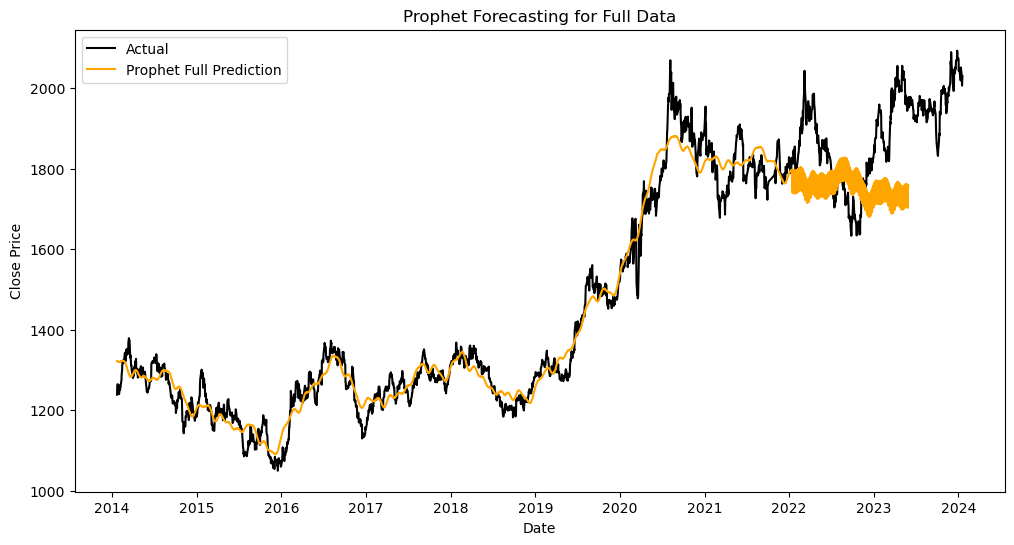

In [23]:
# Train-test split for Prophet
train_size_prophet = int(len(df) * 0.8)  # 80% of the data for training

train_prophet = df.iloc[:train_size_prophet].reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
test_prophet = df.iloc[train_size_prophet:].reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})

# Prophet Model for full data
prophet_model_full = Prophet()
prophet_model_full.fit(train_prophet)
future_full = prophet_model_full.make_future_dataframe(periods=len(test_prophet))  # Extend future to include 6 additional months
forecast_prophet_full = prophet_model_full.predict(future_full)

mae_prophet_full = mean_absolute_error(test_prophet['y'], forecast_prophet_full['yhat'][-len(test_prophet):])
mse_prophet_full = mean_squared_error(test_prophet['y'], forecast_prophet_full['yhat'][-len(test_prophet):])
rmse_prophet_full = np.sqrt(mse_prophet_full)

plt.figure(figsize=(12, 6))
plt.plot(df.index[:len(df)], df['Close'][:len(df)], label='Actual', color='black')
plt.plot(forecast_prophet_full['ds'], forecast_prophet_full['yhat'], label='Prophet Full Prediction', color='orange')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Prophet Forecasting for Full Data')
plt.legend()
plt.show()


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step


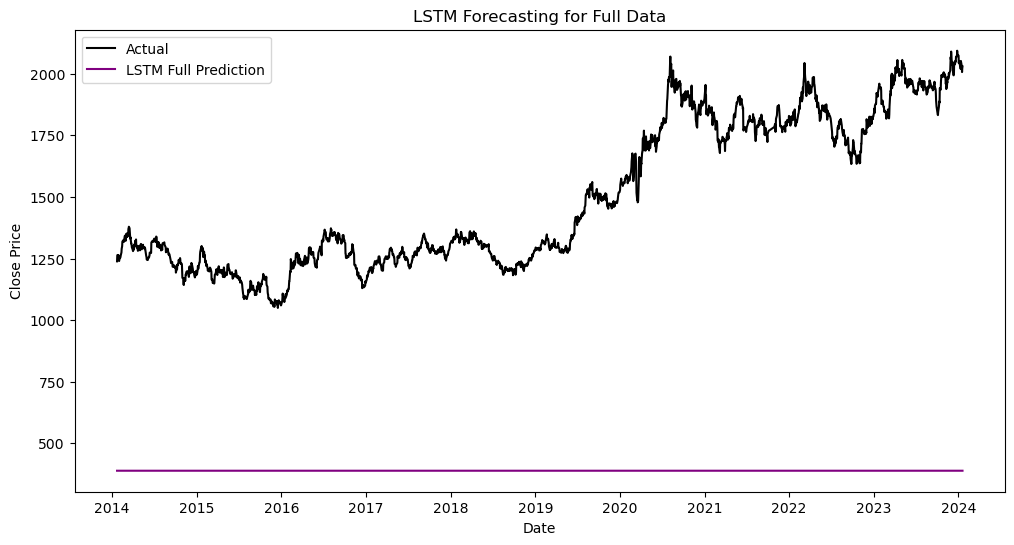

In [24]:
# Train-test split for LSTM
train_size_lstm = int(len(df) * 0.8)  # 80% of the data for training

train_lstm = df.iloc[:train_size_lstm]
test_lstm = df.iloc[train_size_lstm:]

X_train_lstm, y_train_lstm = train_lstm[['Close', 'Volume']].values, train_lstm['Close'].values
X_test_lstm, y_test_lstm = test_lstm[['Close', 'Volume']].values, test_lstm['Close'].values
X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

# LSTM Model for Full Data
X_full_lstm = np.reshape(df[['Close', 'Volume']].values, (df.shape[0], 2, 1))
forecast_lstm_full = lstm_model.predict(X_full_lstm)

mae_lstm_full = mean_absolute_error(df['Close'], forecast_lstm_full)
mse_lstm_full = mean_squared_error(df['Close'], forecast_lstm_full)
rmse_lstm_full = np.sqrt(mse_lstm_full)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual', color='black')
plt.plot(df.index, forecast_lstm_full, label='LSTM Full Prediction', color='purple')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('LSTM Forecasting for Full Data')
plt.legend()
plt.show()


In [25]:
# Print evaluation results
results_df = pd.DataFrame({
    'MAE': [mae_arima_full, mae_sarima_full, mae_hw_full, mae_prophet_full, mae_lstm_full],
    'MSE': [mse_arima_full, mse_sarima_full, mse_hw_full, mse_prophet_full, mse_lstm_full],
    'RMSE': [rmse_arima_full, rmse_sarima_full, rmse_hw_full, rmse_prophet_full, rmse_lstm_full]
}, index=["ARIMA_full", "SARIMA_full", "Holt-Winters_full", "Prophet_full", "LSTM_full"])
print(results_df)

                           MAE           MSE         RMSE
ARIMA_full          531.440393  3.709945e+05   609.093180
SARIMA_full         980.051770  9.790317e+05   989.460314
Holt-Winters_full  1766.933378  3.133394e+06  1770.139410
Prophet_full        147.653942  3.032383e+04   174.137387
LSTM_full          1109.633770  1.320548e+06  1149.150907


# Trading Strategy Development

In [26]:
from ta import add_all_ta_features

In [27]:
df = pd.read_csv('goldstock.csv')
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

In [28]:
# feature engineering
# additional technical indicators
df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume")

In [29]:
# Define a simple moving average crossover strategy
def moving_average_crossover_strategy(data, short_window=20, long_window=50):
    signals = pd.DataFrame(index=data.index)
    signals['signal'] = 0.0

    signals['short_mavg'] = data['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

    signals['long_mavg'] = data['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

    # Generate signals
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)

    # Generate trading orders
    signals['positions'] = signals['signal'].diff()

    return signals

In [30]:
# Define Backtesting
def backtest(strategy, data):
    # Initialize portfolio with no holdings
    portfolio = pd.DataFrame(index=data.index).fillna(0.0)

    # Buy 1 unit when signal transitions from 0 to 1
    portfolio['positions'] = strategy['positions']

    portfolio['positions_diff'] = portfolio['positions'].diff()

    # daily portfolio value
    portfolio['holdings'] = data['Close'] * portfolio['positions']

    portfolio['cash'] = 10000 - (portfolio['positions_diff'] * data['Close']).cumsum()

    portfolio['total'] = portfolio['cash'] + portfolio['holdings']

    return portfolio

In [31]:
# Apply moving average crossover strategy
signals = moving_average_crossover_strategy(df)
portfolio = backtest(signals, df)

In [32]:
# Reverse Trading Strategy
def reverse_strategy(data):
    signals = pd.DataFrame(index=data.index)
    signals['signal'] = 0.0

    # Reverse the trading logic
    signals['signal'] = np.where(data['Volume'] > data['Volume'].rolling(window=20).mean(), -1.0, 0.0)

    # Generate trading orders
    signals['positions'] = signals['signal'].diff()

    return signals

In [33]:
# Apply reverse trading strategy
reverse_signals = reverse_strategy(df)
reverse_portfolio = backtest(reverse_signals, df)

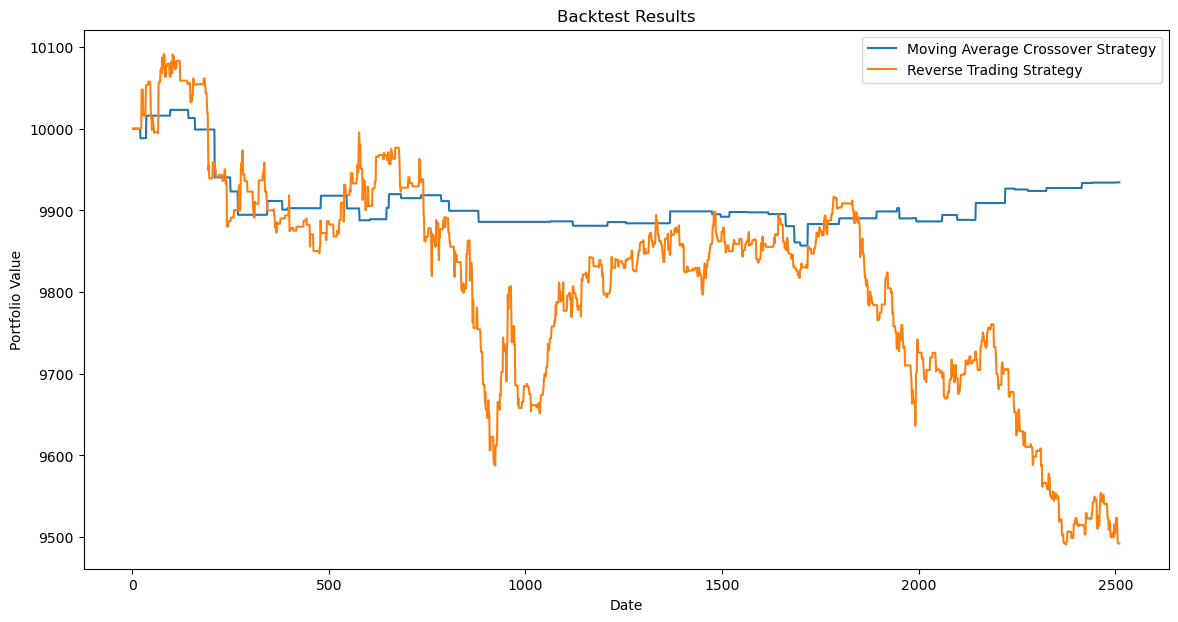

In [34]:
plt.figure(figsize=(14, 7))
plt.plot(portfolio['total'], label='Moving Average Crossover Strategy')
plt.plot(reverse_portfolio['total'], label='Reverse Trading Strategy')
plt.title('Backtest Results')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

# Market Sentiment Analysis

In [35]:
import matplotlib.dates as mdates

In [36]:
df = pd.read_csv('goldstock.csv')

df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values('Date')
df.set_index('Date', inplace=True)

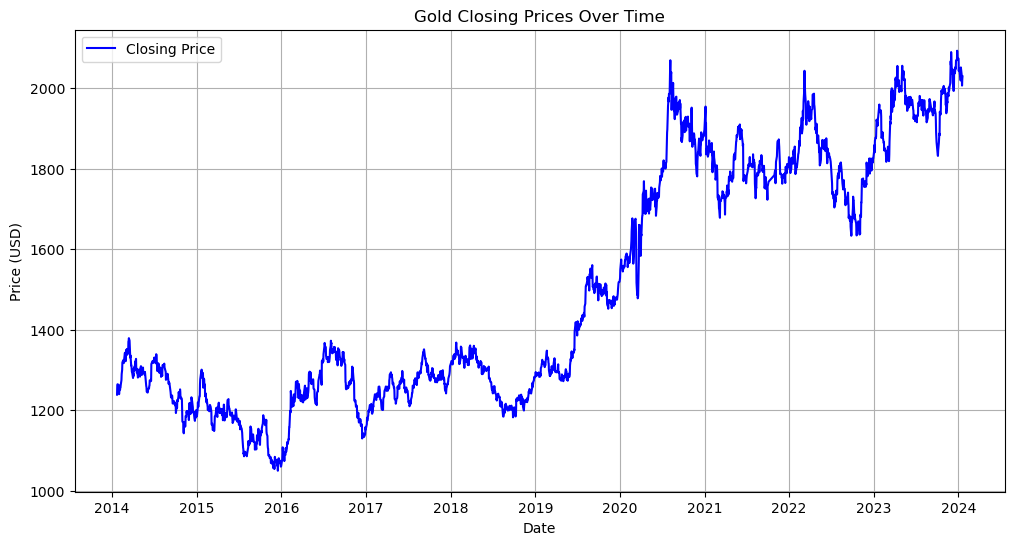

In [37]:
# closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.title('Gold Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

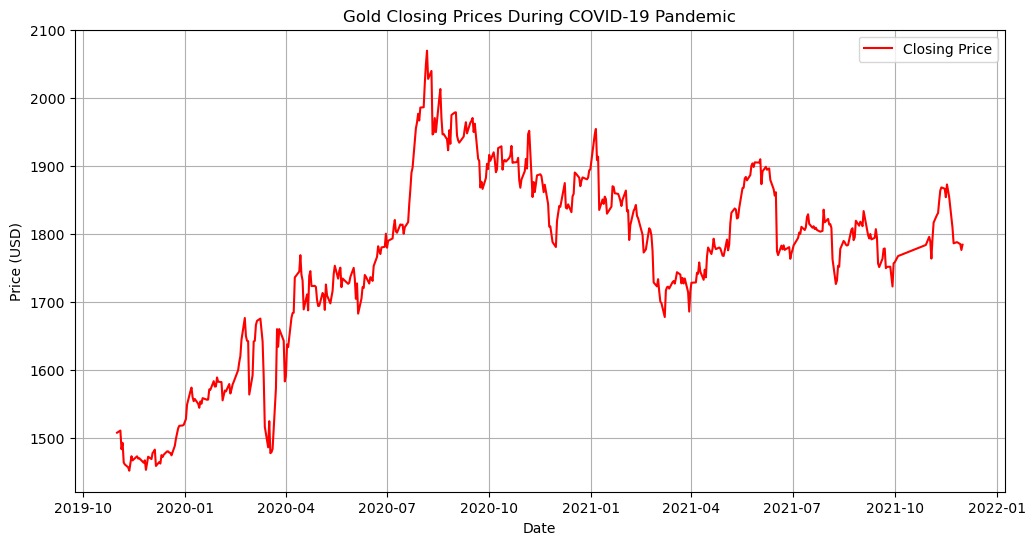

In [42]:
# investigate the impact of market events on gold prices
# plotting gold closing price during COVID-19 pandemic
covid_start_date = '2019-11-01'
covid_slowdown_date = '2021-12-01'
covid_df = df.loc[covid_start_date:covid_slowdown_date]

plt.figure(figsize=(12, 6))
plt.plot(covid_df['Close'], label='Closing Price', color='red')
plt.title('Gold Closing Prices During COVID-19 Pandemic')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

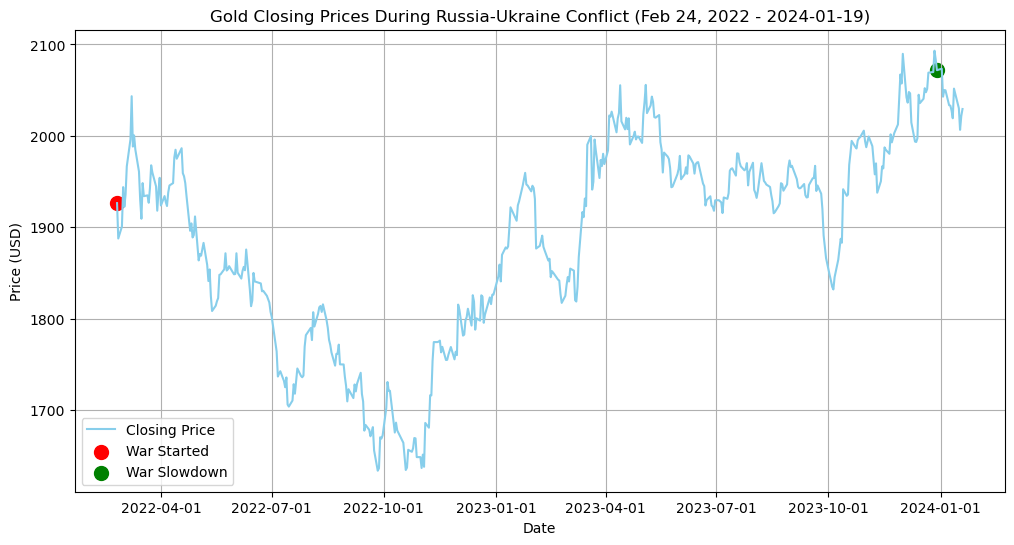

In [39]:
conflict_start_date = pd.to_datetime('2022-02-24')
latest_date = df.index.max()
latest_date_str = latest_date.strftime('%Y-%m-%d')

# Filter the DataFrame for the period from the invasion date to the latest date available
conflict_df = df.loc[conflict_start_date:latest_date_str]

plt.figure(figsize=(12, 6))
plt.plot(conflict_df.index, conflict_df['Close'], label='Closing Price', color='skyblue')

# Add a marker for the start of the war
plt.scatter(conflict_start_date, conflict_df.loc[conflict_start_date, 'Close'], color='red', label='War Started', s=100)

# Define the slowdown date of the war as a datetime object
war_slowdown_date = pd.to_datetime('2023-12-29')

# Check if the slowdown date falls within the range of dates in the DataFrame before accessing its 'Close' price
if war_slowdown_date in conflict_df.index:
    plt.scatter(war_slowdown_date, conflict_df.loc[war_slowdown_date, 'Close'], color='green', label='War Slowdown', s=100)

plt.title(f'Gold Closing Prices During Russia-Ukraine Conflict (Feb 24, 2022 - {latest_date_str})')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.show()


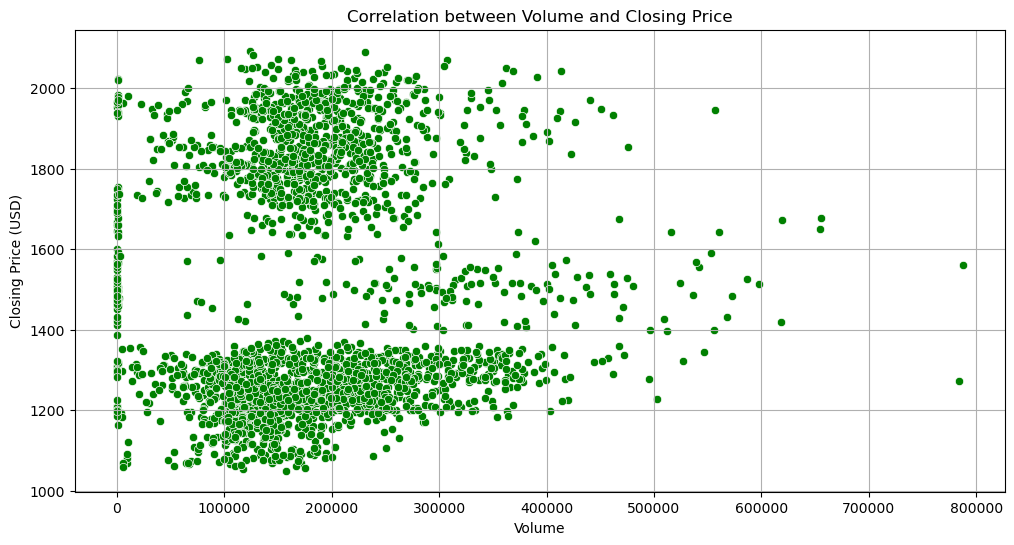

In [40]:
# assess market sentiment and its influence on short-term and long-term price movements
# plotting correlation between volume and price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Volume', y='Close', data=df, color='green')
plt.title('Correlation between Volume and Closing Price')
plt.xlabel('Volume')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()

# Statistical Analysis

In [41]:
from scipy import stats
from scipy.stats import pearsonr
import plotly.express as px
import plotly.graph_objects as go

In [42]:
df = pd.read_csv('goldstock.csv')

df['Date'] = pd.to_datetime(df['Date'])

In [43]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Unnamed: 0    0
Date          0
Close         0
Volume        0
Open          0
High          0
Low           0
dtype: int64


In [44]:
print("\nBasic Information About the Dataset:")
print(df.info())


Basic Information About the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  2511 non-null   int64         
 1   Date        2511 non-null   datetime64[ns]
 2   Close       2511 non-null   float64       
 3   Volume      2511 non-null   int64         
 4   Open        2511 non-null   float64       
 5   High        2511 non-null   float64       
 6   Low         2511 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 137.4 KB
None


In [45]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
        Unnamed: 0                           Date        Close         Volume  \
count  2511.000000                           2511  2511.000000    2511.000000   
mean   1260.792911  2019-01-17 07:28:27.526881792  1498.726085  185970.770609   
min       0.000000            2014-01-22 00:00:00  1049.600000       1.000000   
25%     630.500000            2016-07-19 12:00:00  1249.850000  126693.500000   
50%    1259.000000            2019-01-17 00:00:00  1332.800000  175421.000000   
75%    1888.500000            2021-07-17 12:00:00  1805.850000  234832.000000   
max    2532.000000            2024-01-19 00:00:00  2093.100000  787217.000000   
std     729.262879                            NaN   298.824811   97600.769382   

              Open         High          Low  
count  2511.000000  2511.000000  2511.000000  
mean   1498.725528  1508.451454  1488.869932  
min    1051.500000  1062.700000  1045.400000  
25%    1249.500000  1257.300000  1242.350000  
50%    133

In [46]:
shapiro_test_result, p_value = stats.shapiro(df['Close'])
print("Shapiro-Wilk Test for Normality:")
print("Test statistic:", shapiro_test_result)
print("p-value:", p_value)

Shapiro-Wilk Test for Normality:
Test statistic: 0.8725119233131409
p-value: 2.9871479364012126e-41


In [47]:
pearson_corr = df['Close'].corr(df['Volume'])
print("Pearson Correlation Coefficient between 'Close' and 'Volume':", pearson_corr)

Pearson Correlation Coefficient between 'Close' and 'Volume': 0.02283510561318144


In [48]:
# Test for correlation between 'Close' prices and 'Open' prices
pearson_corr_open = df['Close'].corr(df['Open'])
print("Pearson Correlation Coefficient between 'Close' and 'Open':", pearson_corr_open)

Pearson Correlation Coefficient between 'Close' and 'Open': 0.9989935254760057


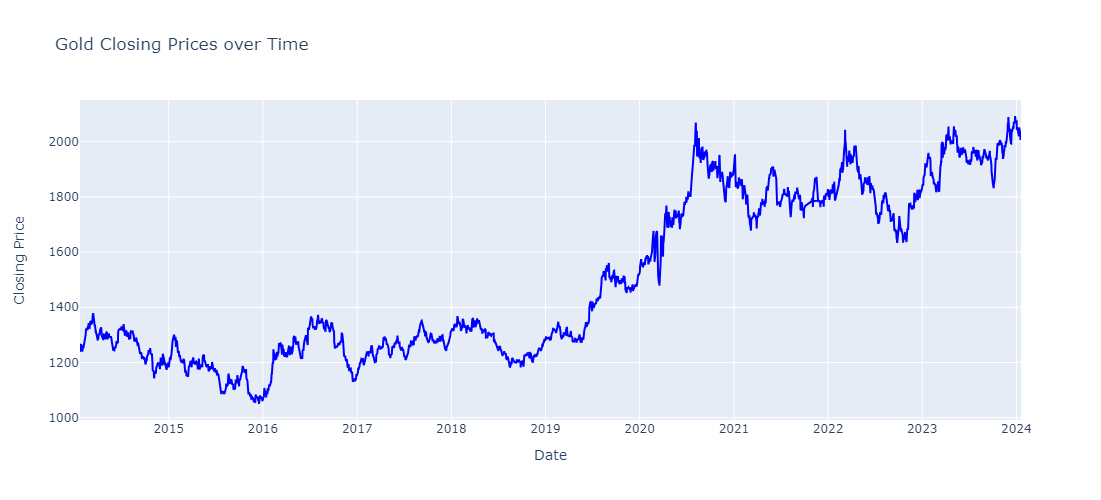

In [49]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', 
                         line=dict(color='blue'), name='Closing Price'))

fig.update_layout(title='Gold Closing Prices over Time',
                  xaxis_title='Date',
                  yaxis_title='Closing Price',
                  showlegend=False,
                  xaxis=dict(showgrid=True),
                  yaxis=dict(showgrid=True),
                  width=1100, 
                  height=500) 

fig.show()


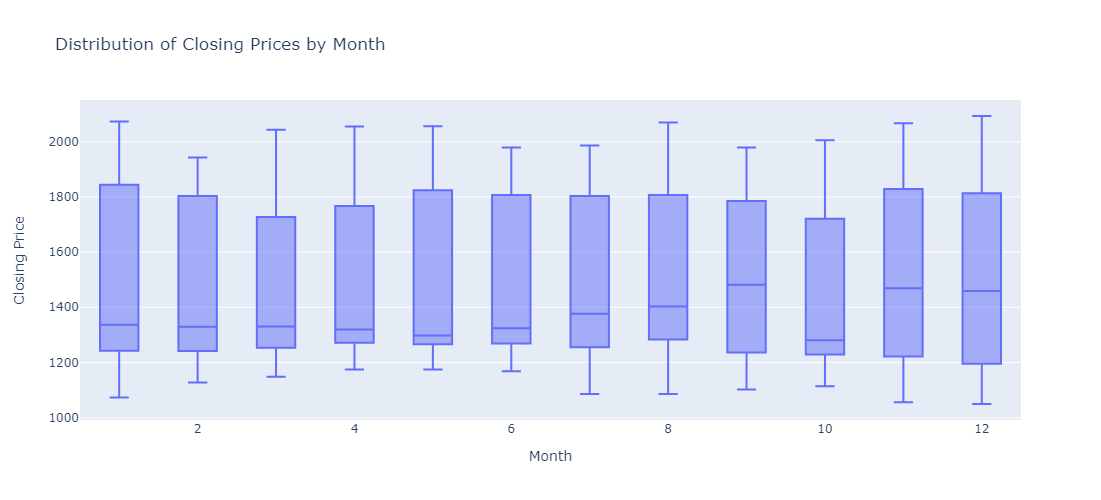

In [50]:
df['Month'] = df['Date'].dt.month

fig = px.box(df, x='Month', y='Close', title='Distribution of Closing Prices by Month')
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Closing Price',
    width=1100,  
    height=500)
fig.show()

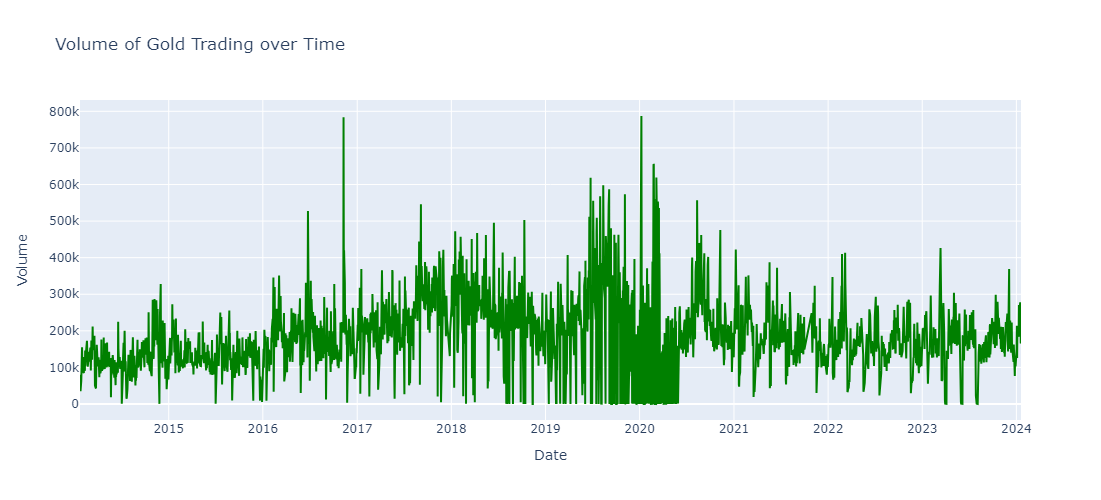

In [51]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['Volume'], mode='lines', 
                         line=dict(color='green'), name='Volume'))

fig.update_layout(title='Volume of Gold Trading over Time',
                  xaxis_title='Date',
                  yaxis_title='Volume',
                  showlegend=False,
                  xaxis=dict(showgrid=True),
                  yaxis=dict(showgrid=True),
                  width=1100, # specify the width of the figure
                  height=500) # specify the height of the figure)

fig.show()

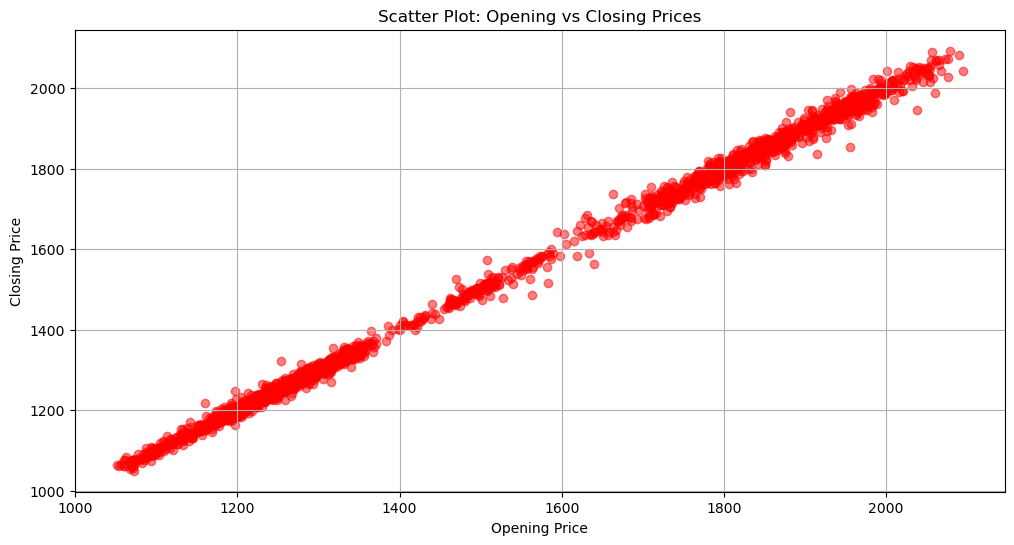

In [52]:
# Plotting a scatter plot to visualize the relationship between Closing and Opening Prices
plt.figure(figsize=(12, 6))
plt.scatter(df['Open'], df['Close'], color='red', alpha=0.5)
plt.title('Scatter Plot: Opening vs Closing Prices')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

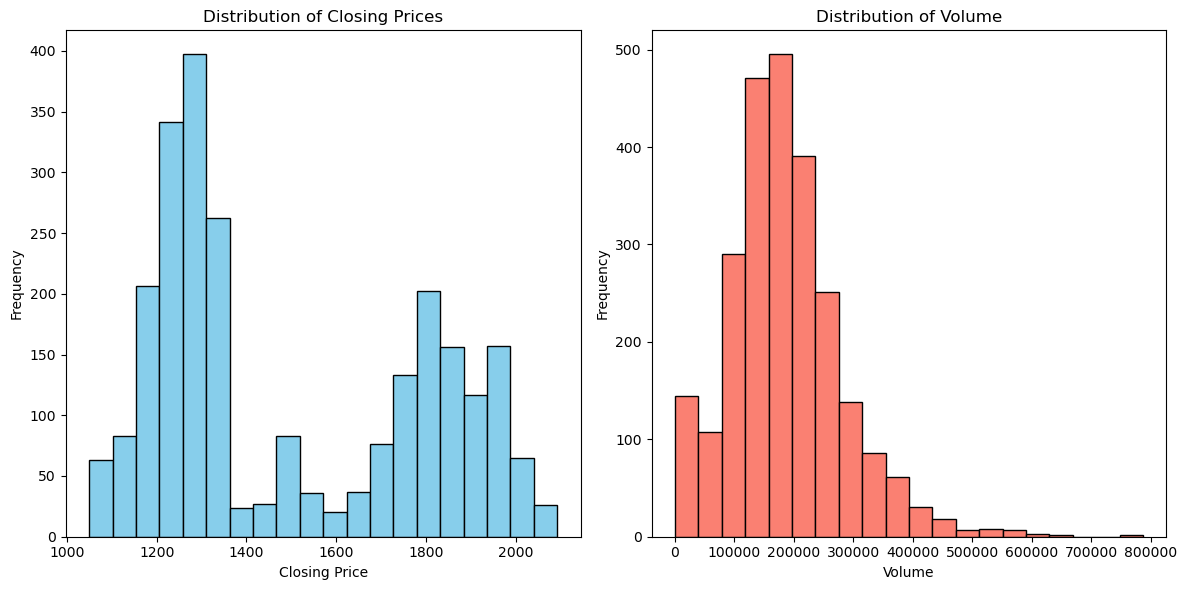

In [53]:
# Plotting histograms to visualize the distributions of 'Close' and 'Volume'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Close'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Volume'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()